### Описание задания

Проанализировать временные ряды на стационарность. В случае нестационарности рядов, произвести преобразования и привести их к стационарному виду. В качестве критериев стационарности использовать тест Дики-Фуллера и визуальную проверку.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [2]:
sales_of_company = pd.read_csv('../Data/monthly-sales-of-company-x-jan-6.csv')
robberies_in_boston = pd.read_csv('../Data/monthly-boston-armed-robberies-j.csv')
airlines_passengers = pd.read_csv('../Data/international-airline-passengers.csv')
mean_monthly_temp = pd.read_csv('../Data/mean-monthly-air-temperature-deg.csv')
dowjones_closing = pd.read_csv('../Data/weekly-closings-of-the-dowjones-.csv')
female_births = pd.read_csv('../Data/daily-total-female-births-in-cal.csv')

**Описание датасетов:**

- sales_of_company - Monthly sales of company
- robberies_in_boston - Monthly Boston armed robberies
- airlines_passengers - International airline passengers: monthly totals in thousands
- mean_monthly_temp - Mean monthly air temperature (Deg. F) Nottingham Castle
- dowjones_closing - Weekly closings of the Dow-Jones industrial average
- female_births - Daily total female births in California

In [3]:
all_series = {
    "Monthly sales of company": sales_of_company["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

### Необходимые функции

In [4]:
def test_stationarity(timeseries):
    """Dickey-Fuller Test"""
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    
def tsplot(data, lags=None, figsize=(14, 8), style='bmh'):
    """Make original, autocorrelation(ACR) and partial autocorrelation(PACF) plots"""
    test_stationarity(data)
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        data.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(data, lags=len(data) - 1, ax=acf_ax, alpha=0.05, auto_ylims=True)
        smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax, alpha=0.05, auto_ylims=True)

        plt.tight_layout()
    return

### Исследование "Monthly sales of company"

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


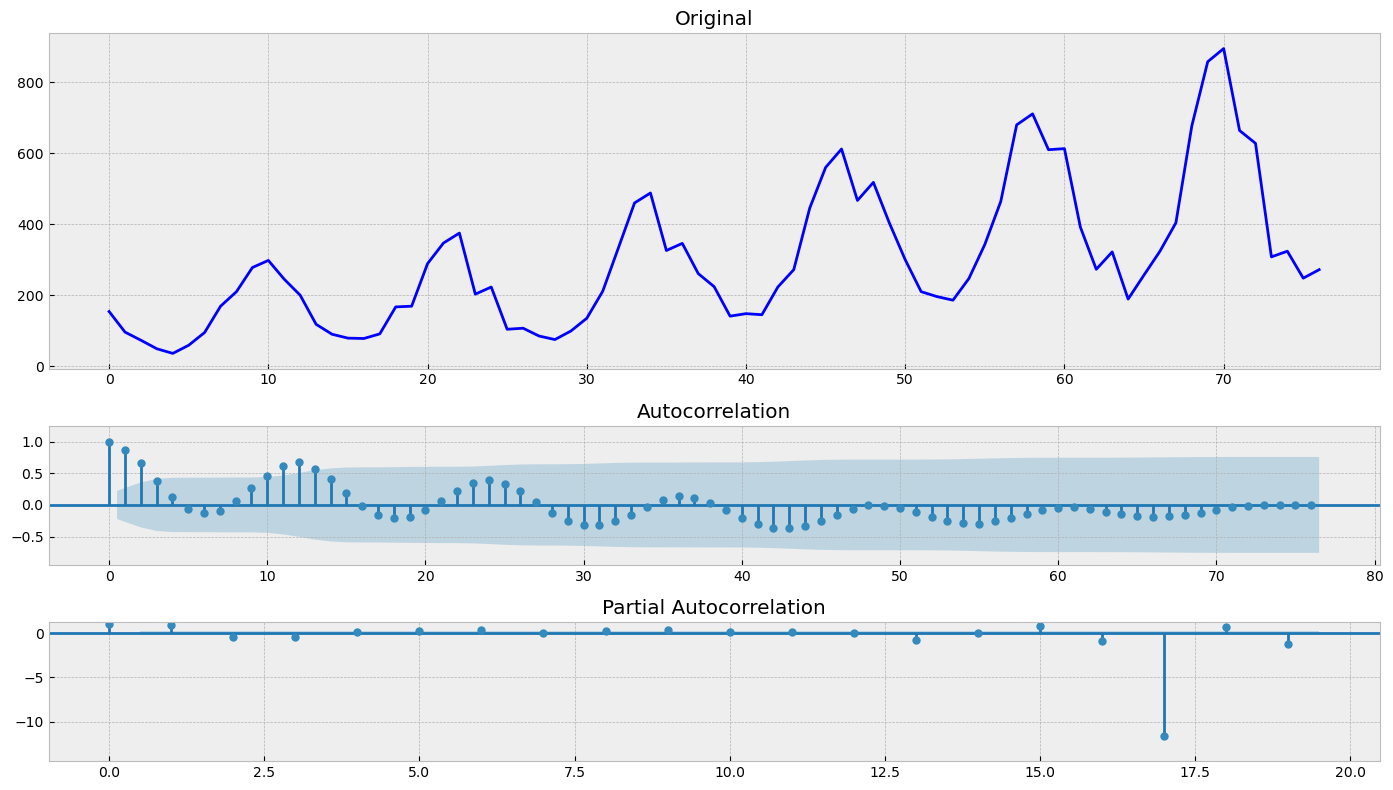

In [5]:
data = all_series['Monthly sales of company']
tsplot(data)

Визуально наблюдаем наличие тренда и сезонности в данных. Тест Дики-Фуллера также не отвергает гипотезу о нестационарности ряда.

Применим преобразование Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


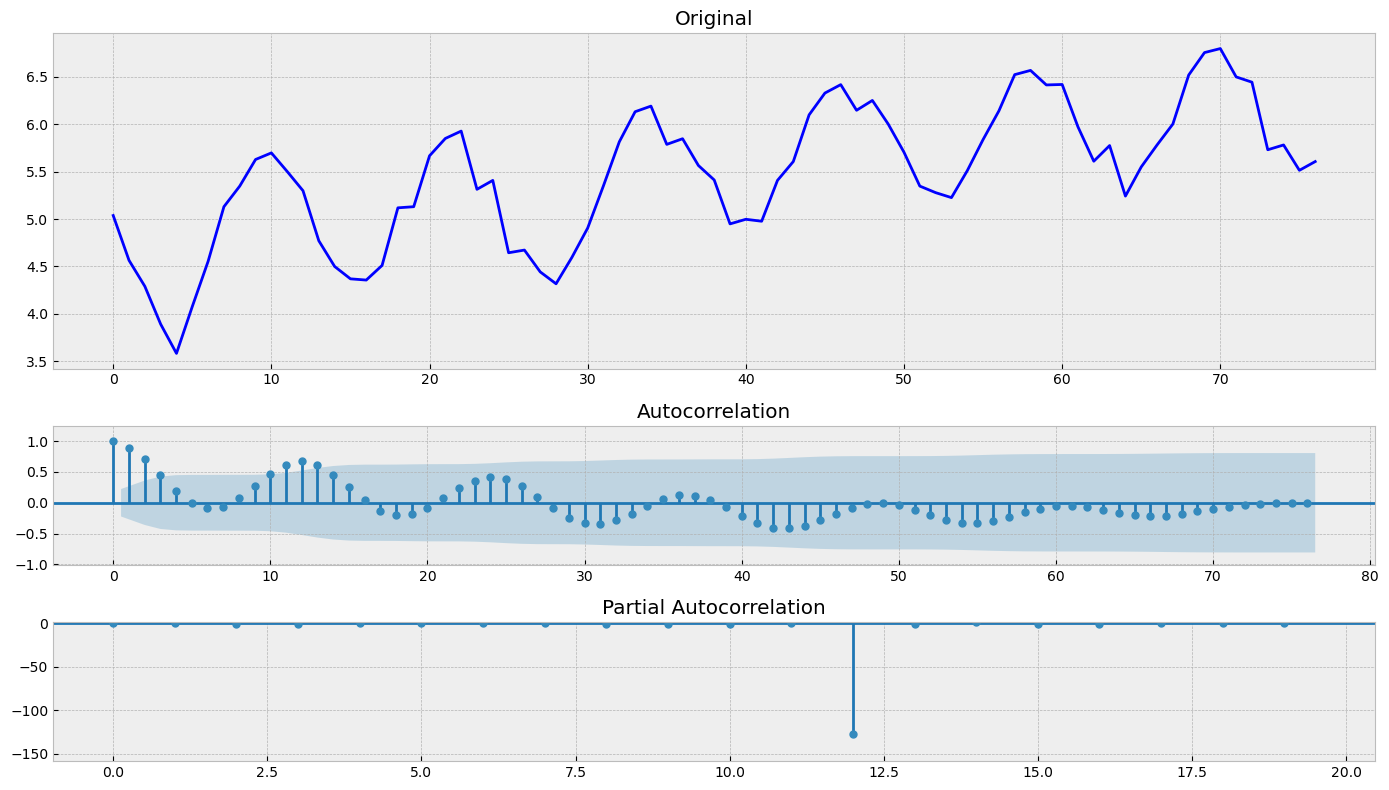

In [6]:
data = boxcox(data, 0)
tsplot(data)

Устраним тренд, применив дифференцирование.

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


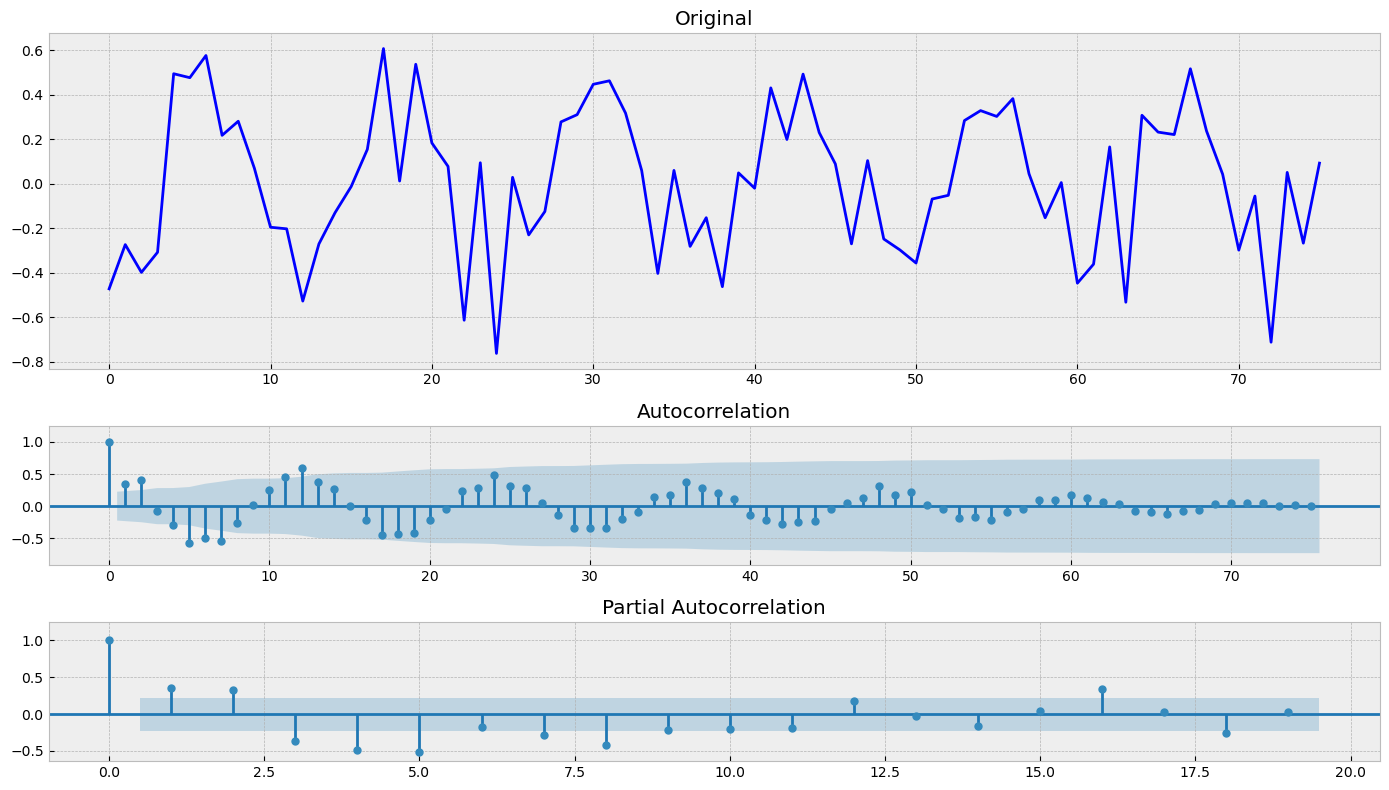

In [7]:
data = data[1:] - data[:-1]
tsplot(data)

Устраним сезонность, применив дифференцирование с лагом 12.

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


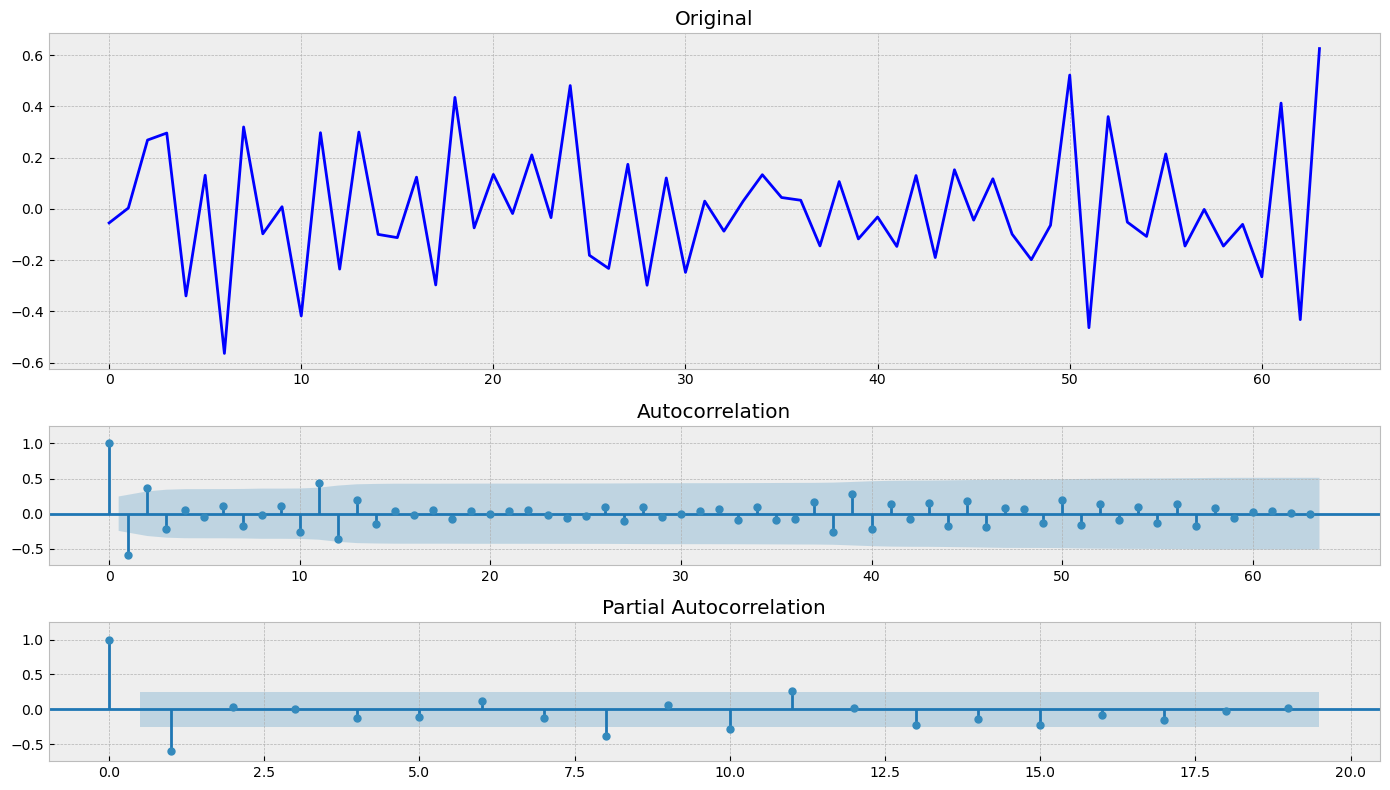

In [8]:
data = data[12:] - data[:-12]
tsplot(data)

Визульано наблюдается стационарность ряда, но результат теста Дики-Фуллера всё ещё не позволяет отвергнуть гипотезу о нестационарности ряда. Применим дополнительное дифференцирование.

Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


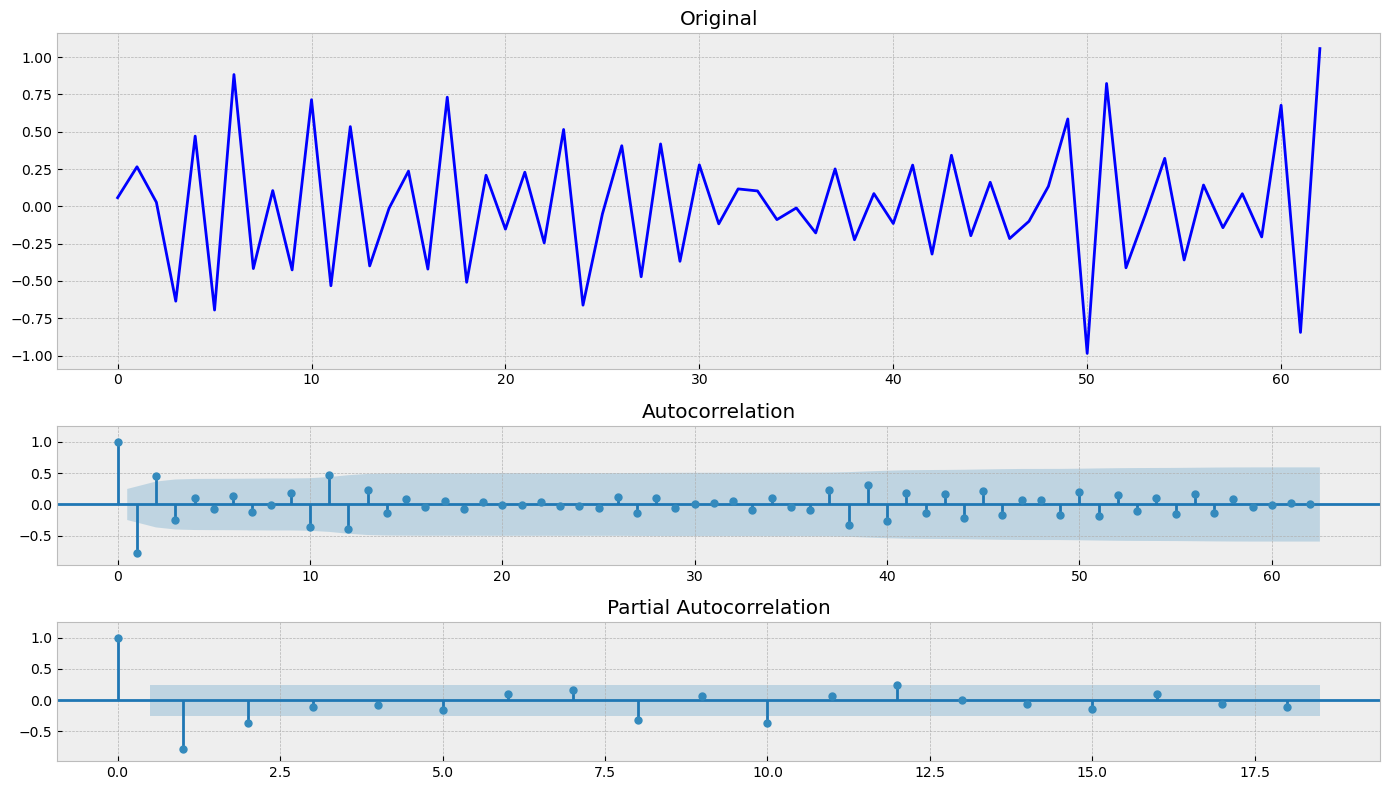

In [9]:
data = data[1:] - data[:-1]
tsplot(data)

**Вывод:** визуально и по результатам теста Дики-Фуллера мы можем отвергнуть гипотезу о нестационарности ряда.

### Исследование "Monthly Boston armed robberies".

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


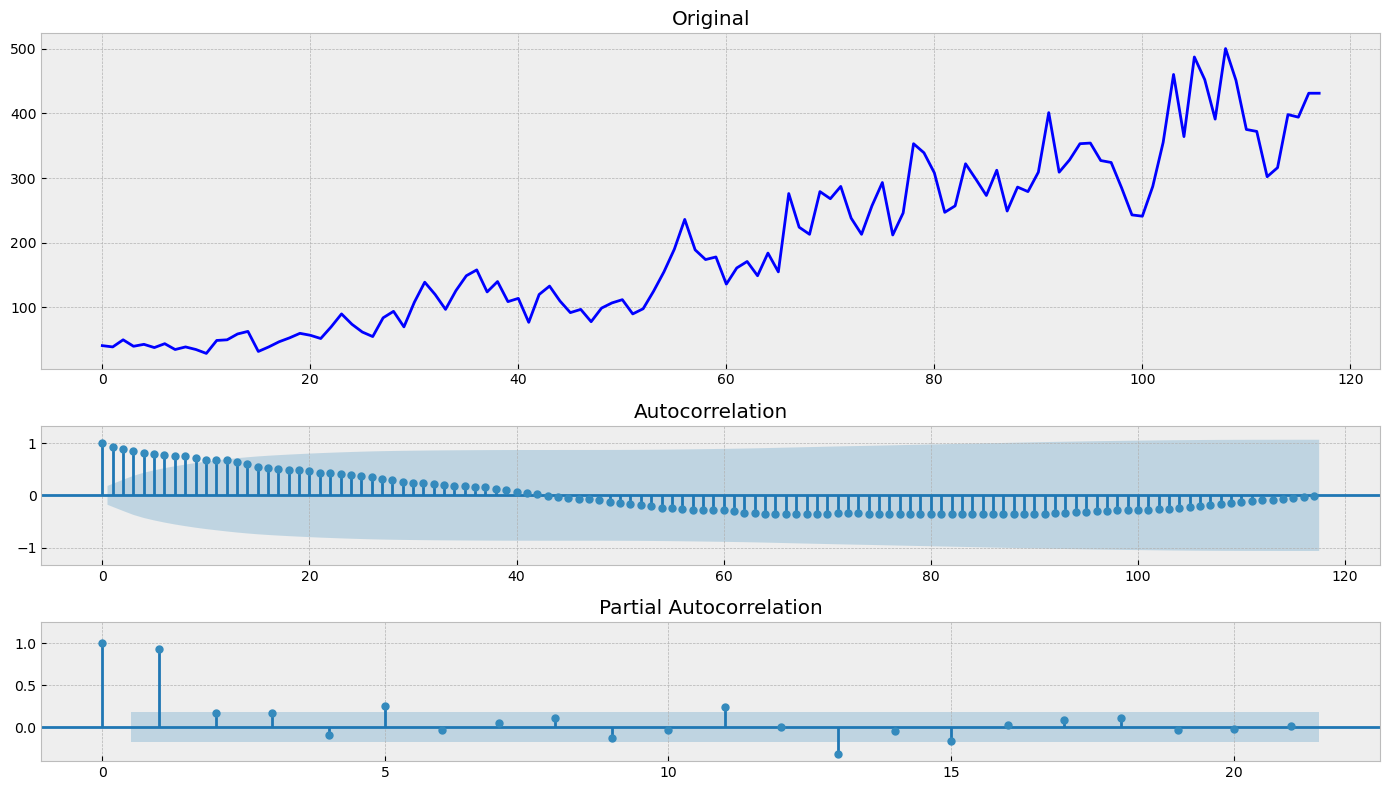

In [10]:
data = all_series['Monthly Boston armed robberies']
tsplot(data)

Визуально наблюдается присутствие тренда. Тест Дики-Фуллера также не отвергает гипотезу о нестационарности ряда.

Применим преобразование Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


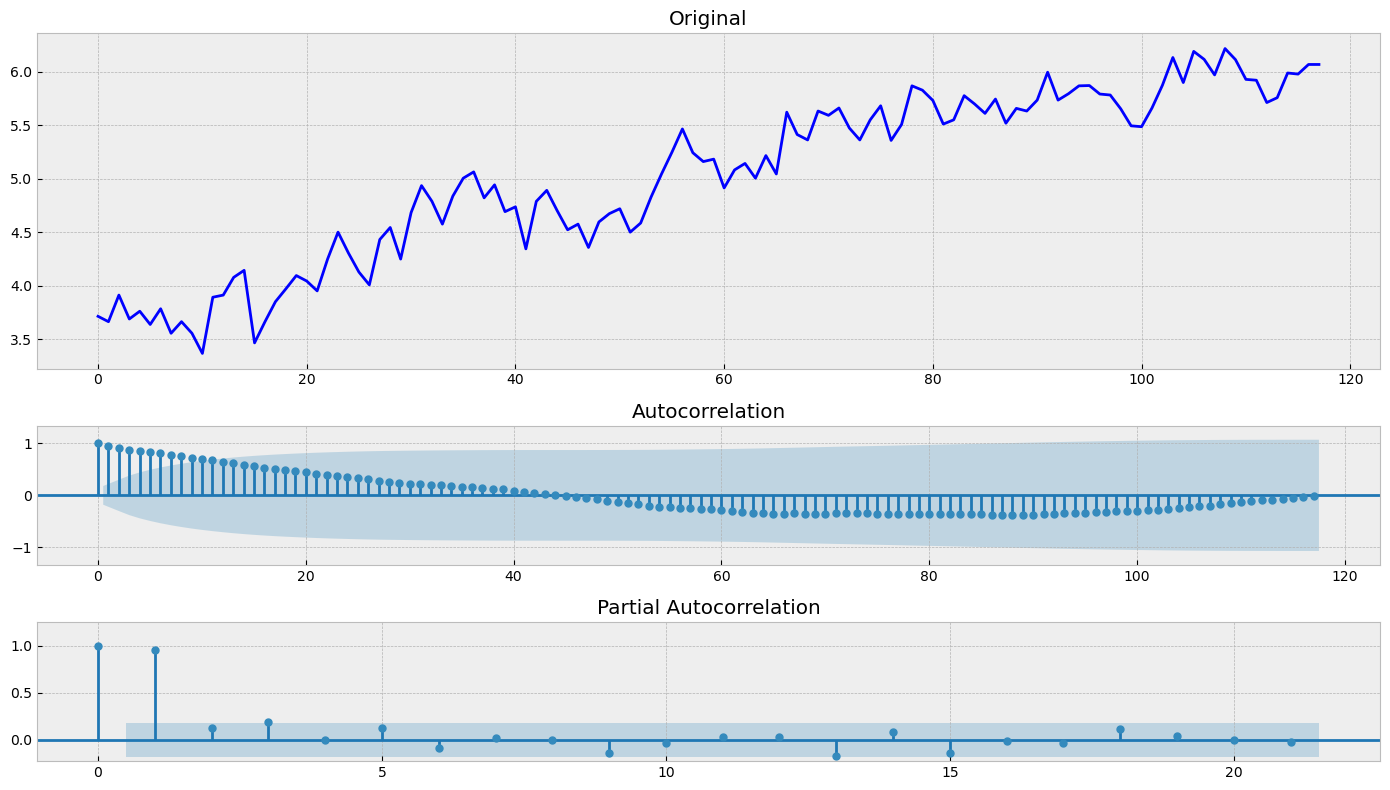

In [11]:
data = boxcox(data, 0)
tsplot(data)

Устраним тренд, применив дифференцирование.

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


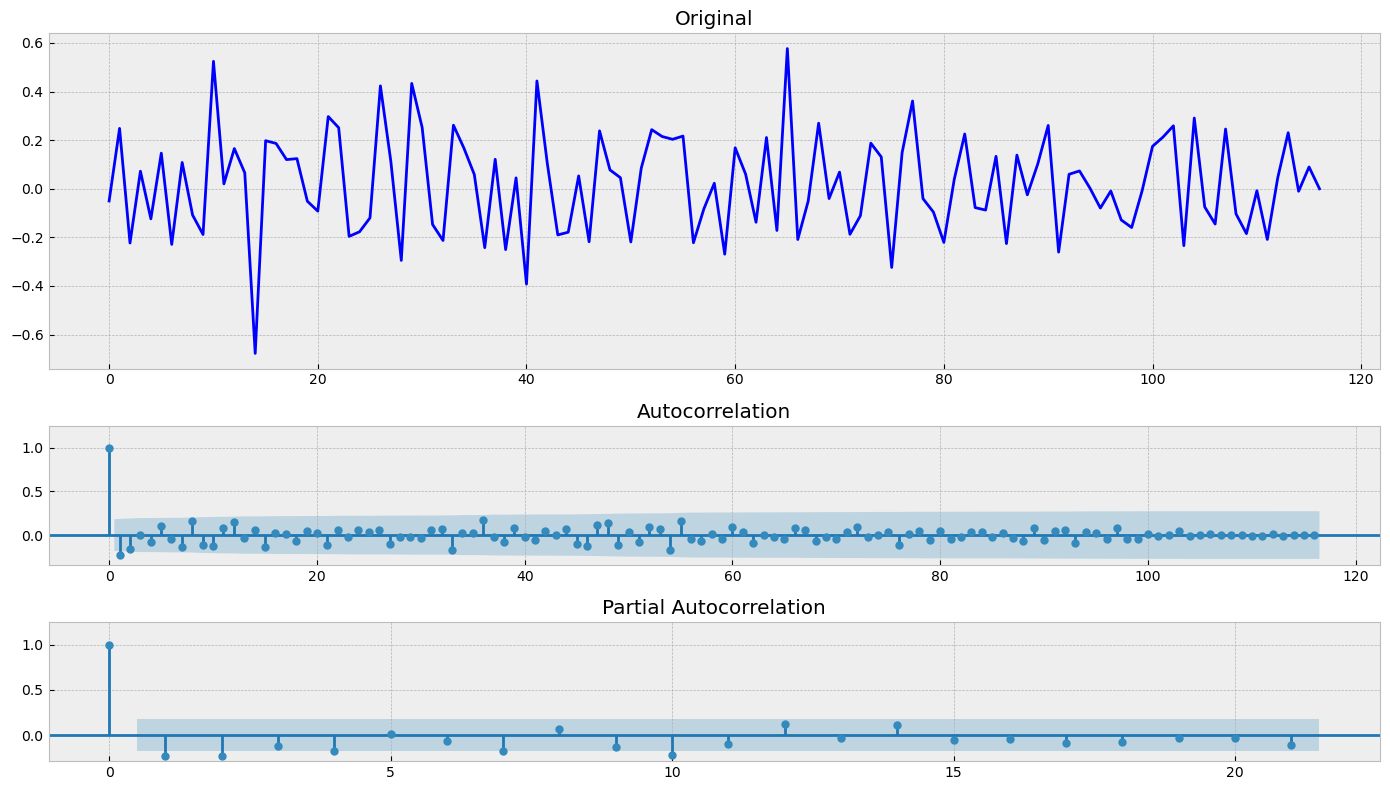

In [12]:
data = data[1:] - data[:-1]
tsplot(data)

**Вывод:** визуально и по результатам теста Дики-Фуллера мы можем отвергнуть гипотезу о нестационарности ряда.

### Исследование "International airline passengers: monthly totals in thousands".

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


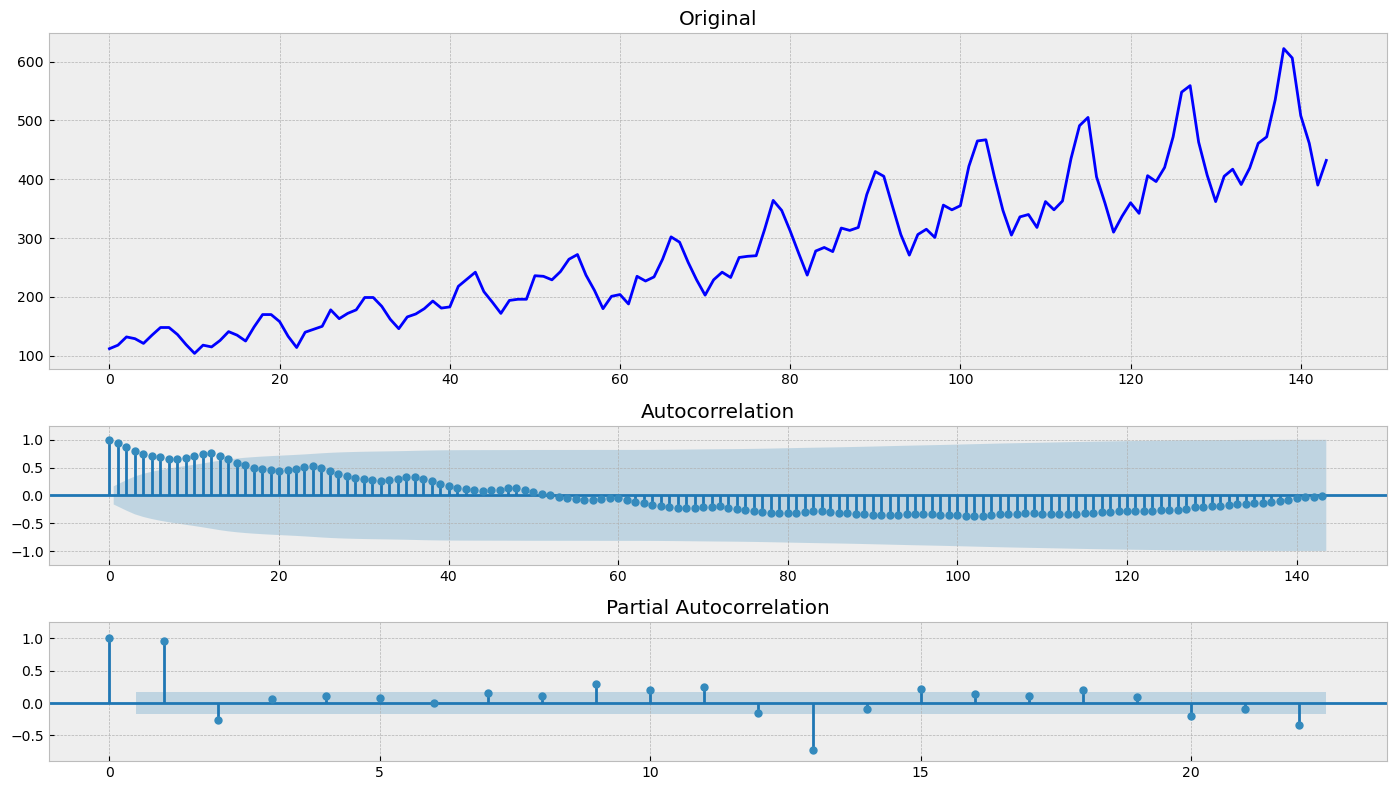

In [13]:
data = all_series['International airline passengers: monthly totals in thousands']
tsplot(data)

Визуально наблюдается присутствие тренда и сезонности. Тест Дики-Фуллера также не отвергает гипотезу о нестационарности ряда.

Применим преобразование Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


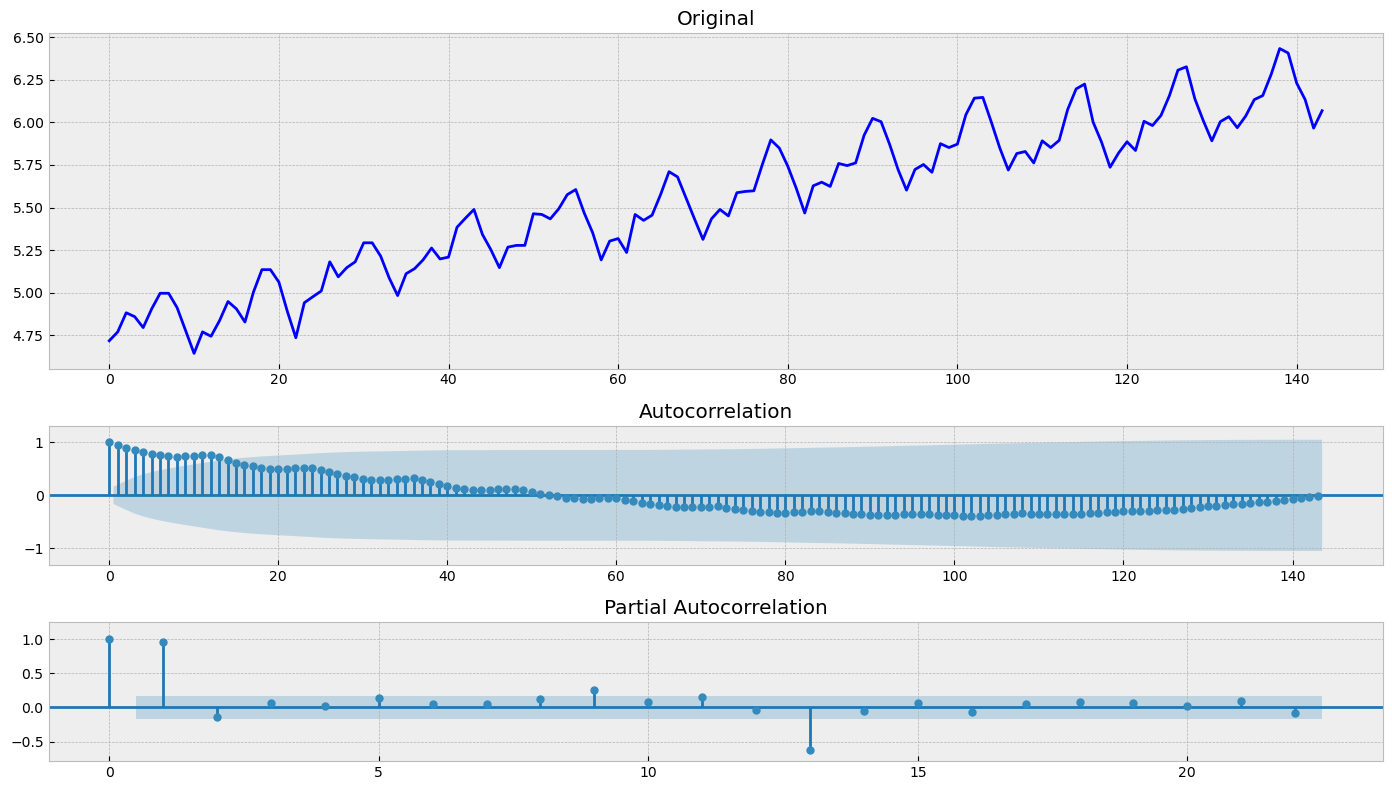

In [14]:
data = boxcox(data, 0)
tsplot(data)

Устраним тренд, применив дифференцирование.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


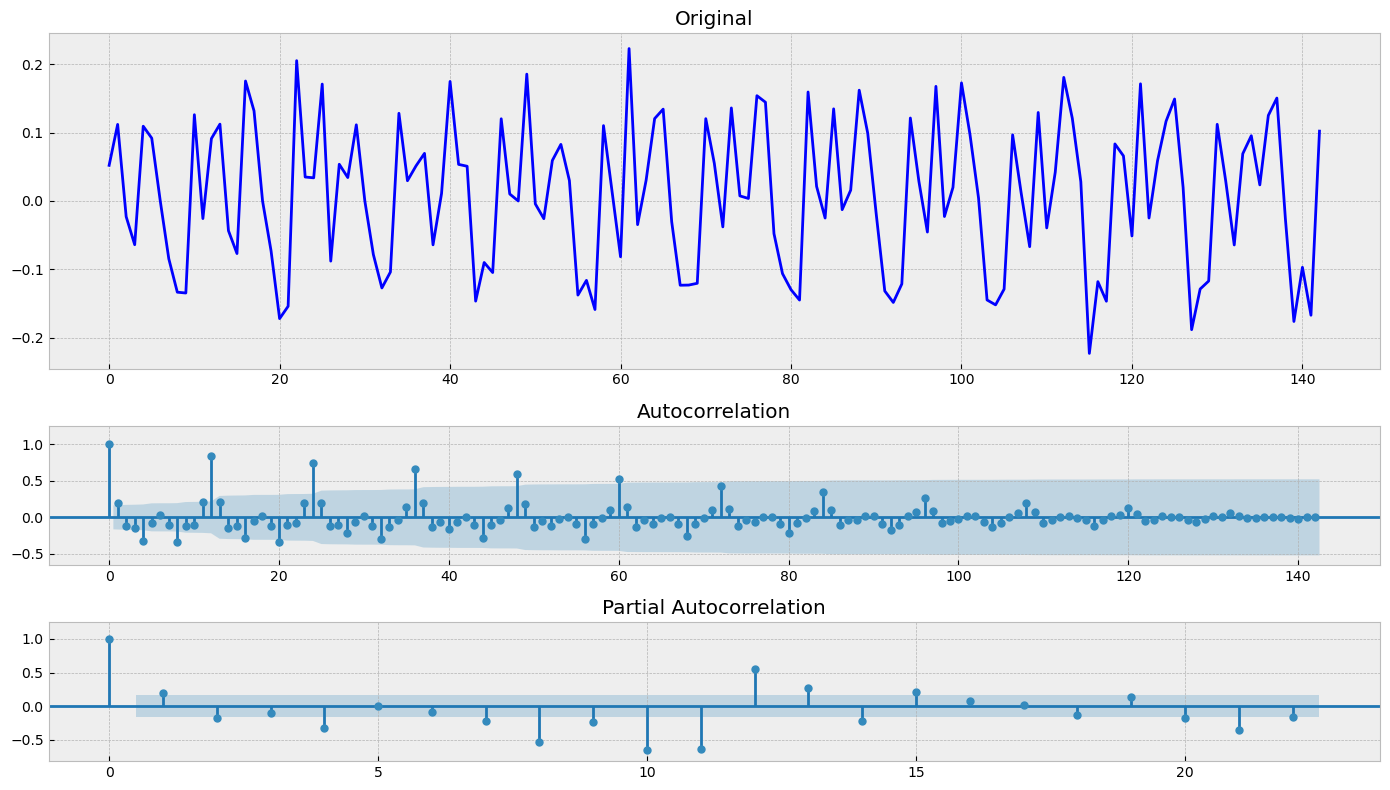

In [15]:
data = data[1:] - data[:-1]
tsplot(data)

Устраним сезонность, применив дифференцирование с лагом 12.

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


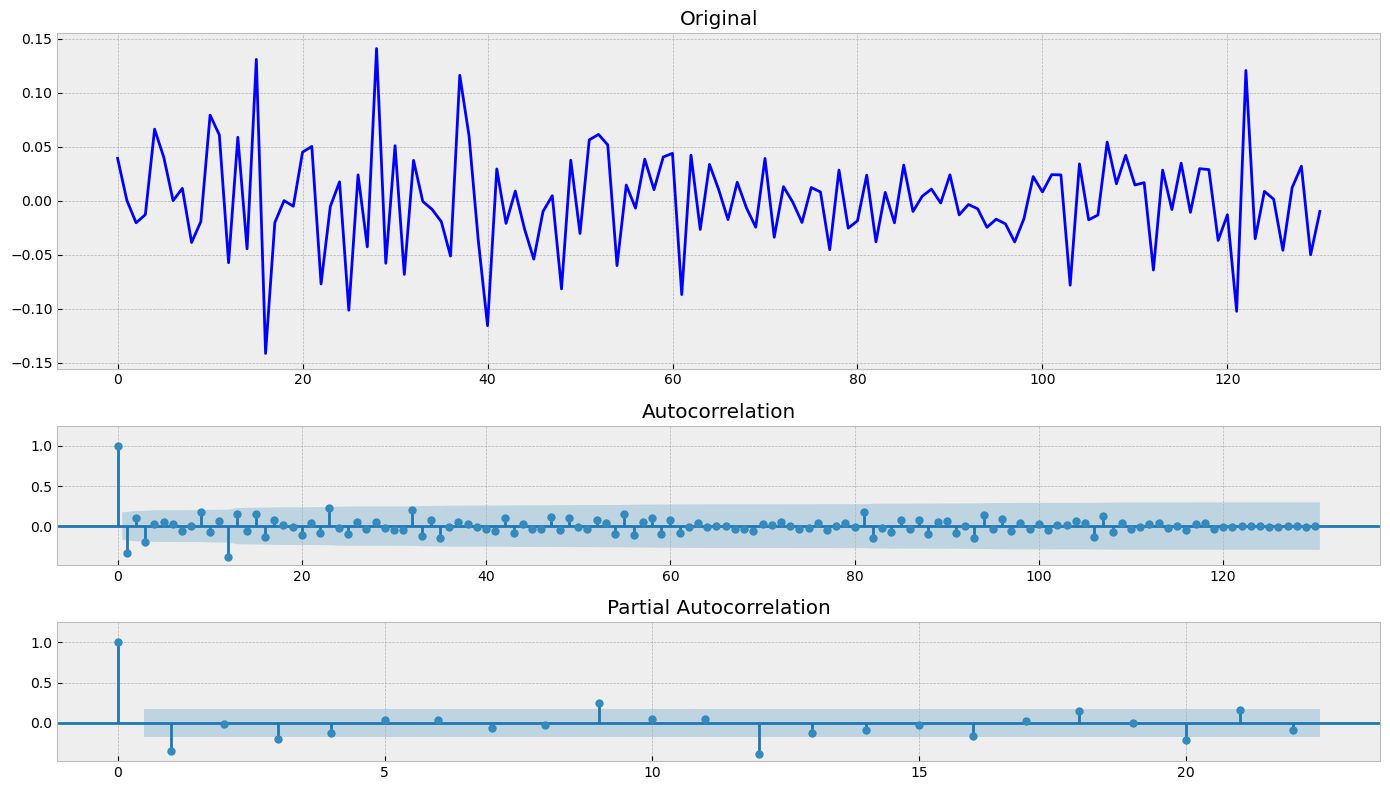

In [16]:
data = data[12:] - data[:-12]
tsplot(data)

**Вывод:** визуально и по результатам теста Дики-Фуллера мы можем отвергнуть гипотезу о нестационарности ряда.

### Исследование "Mean monthly air temperature (Deg. F) Nottingham Castle".

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


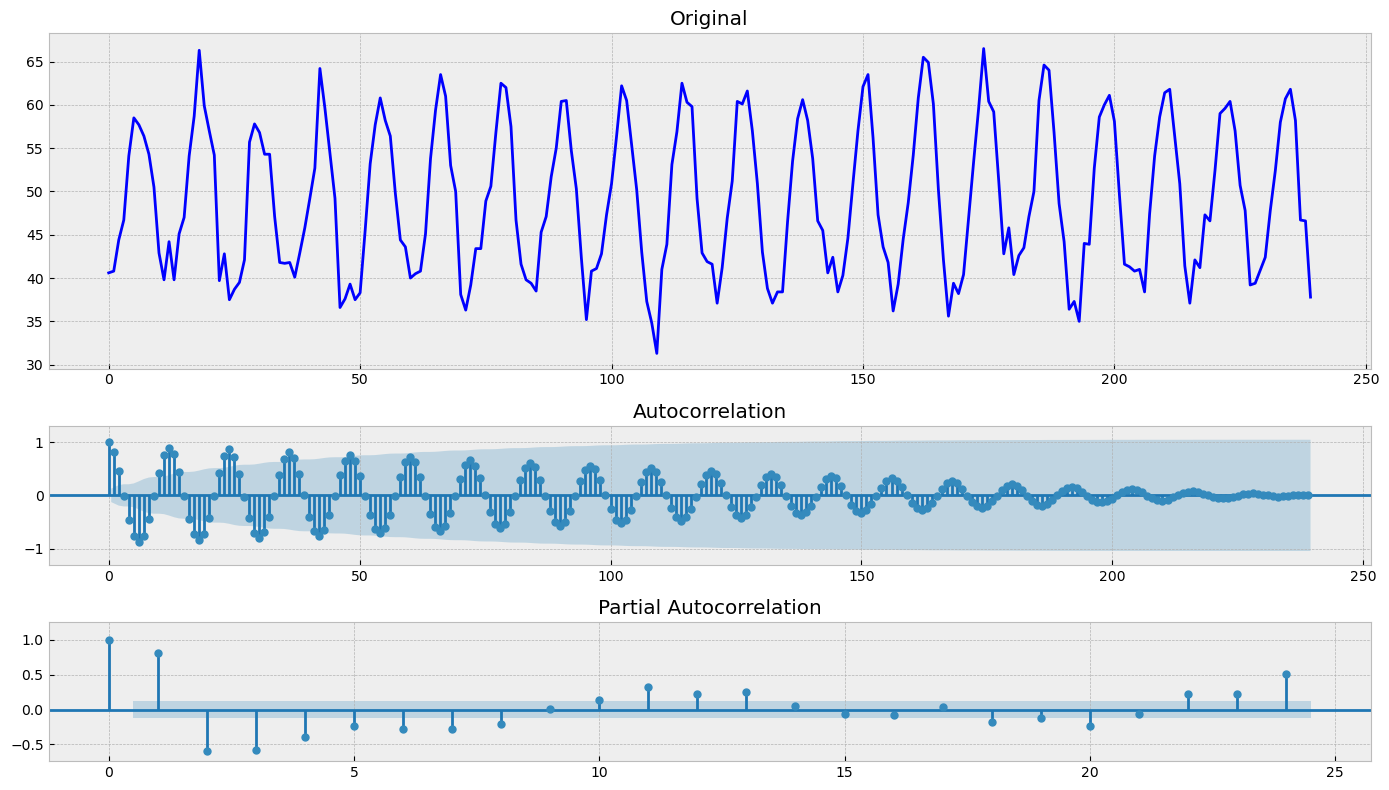

In [17]:
data = all_series['Mean monthly air temperature (Deg. F) Nottingham Castle']
tsplot(data)

Визуально наблюдается присутствие тренда и сезонности, но результат теста Дики-Фуллера позволяет отвергнуть гипотезу о нестационарности ряда.

Применим преобразование Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


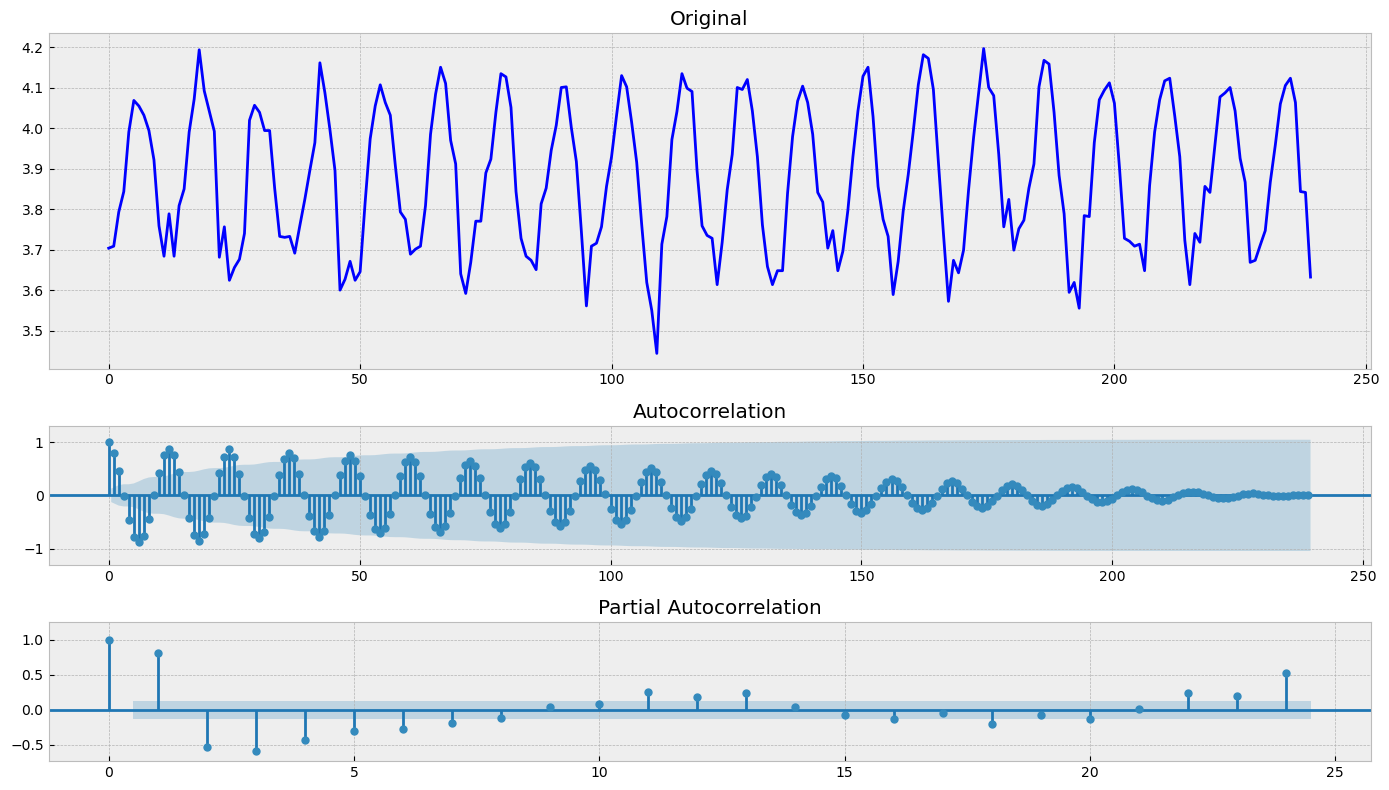

In [18]:
data = boxcox(data, 0)
tsplot(data)

Устраним тренд, применив дифференцирование.

Results of Dickey-Fuller Test:
Test Statistic                -1.214226e+01
p-value                        1.640728e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


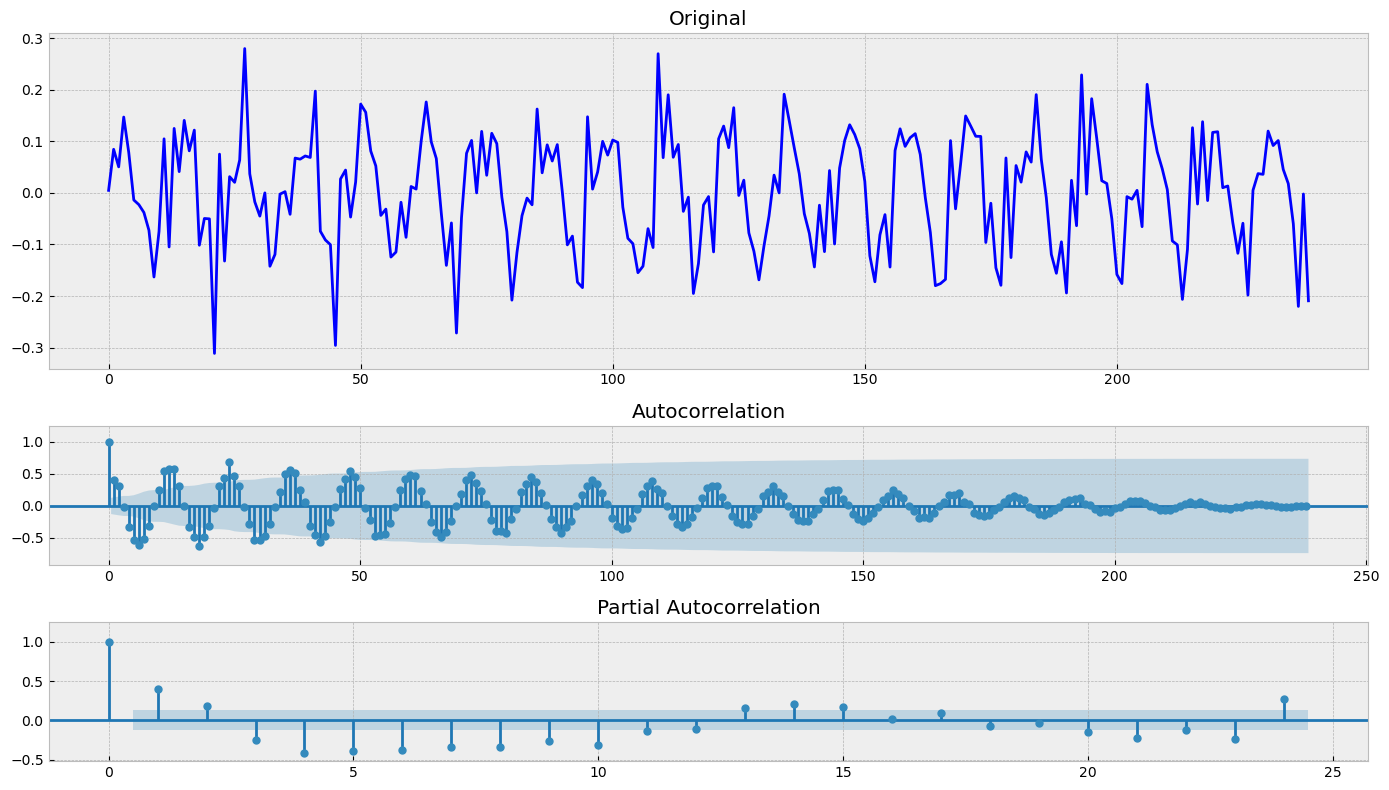

In [19]:
data = data[1:] - data[:-1]
tsplot(data)

Устраним сезонность, применив дифференцирование с лагом 12.

Results of Dickey-Fuller Test:
Test Statistic                -7.999033e+00
p-value                        2.361164e-12
#Lags Used                     1.500000e+01
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.875337e+00
Critical Value (10%)          -2.574124e+00
dtype: float64


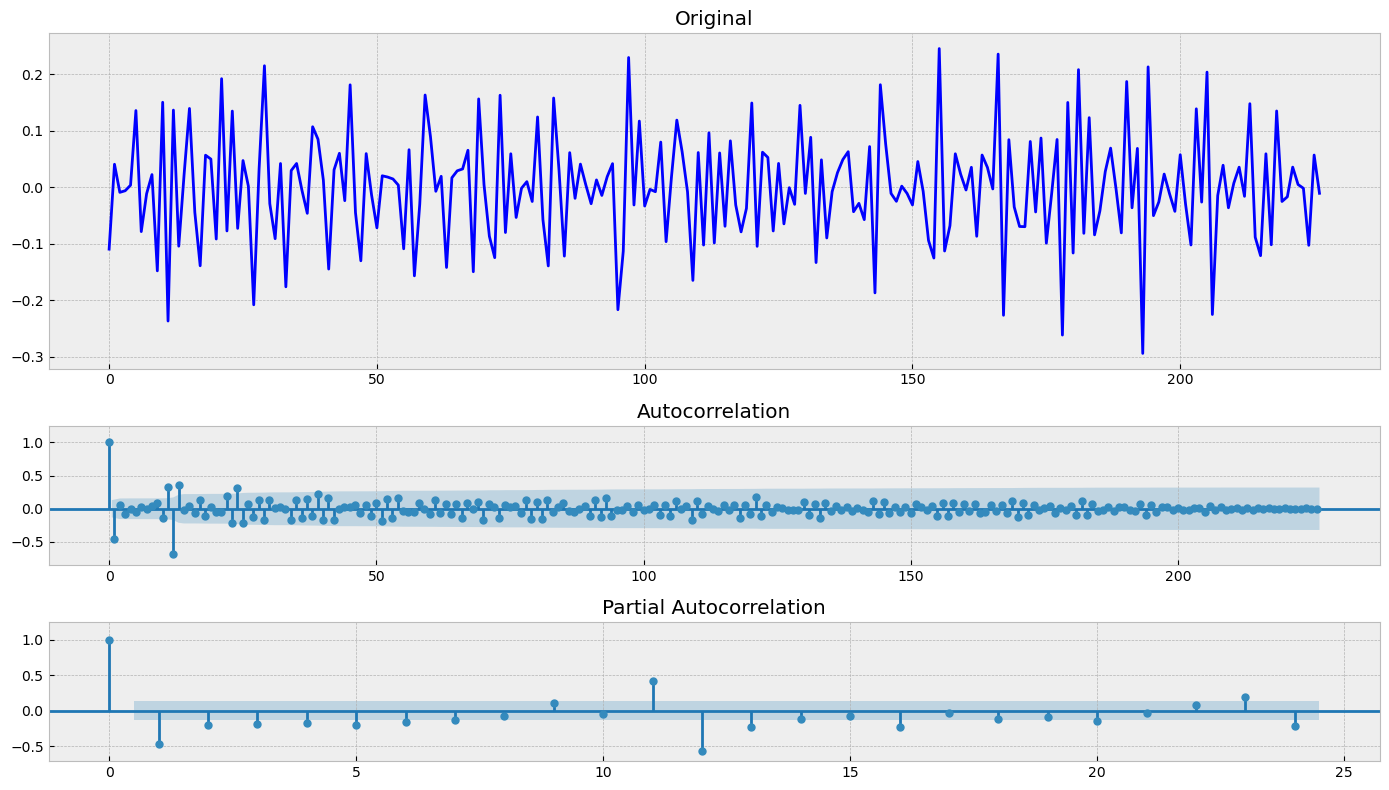

In [20]:
data = data[12:] - data[:-12]
tsplot(data)

**Вывод:** визуально и по результатам теста Дики-Фуллера мы можем отвергнуть гипотезу о нестационарности ряда.

### Исследование "Weekly closings of the Dow-Jones industrial average".

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


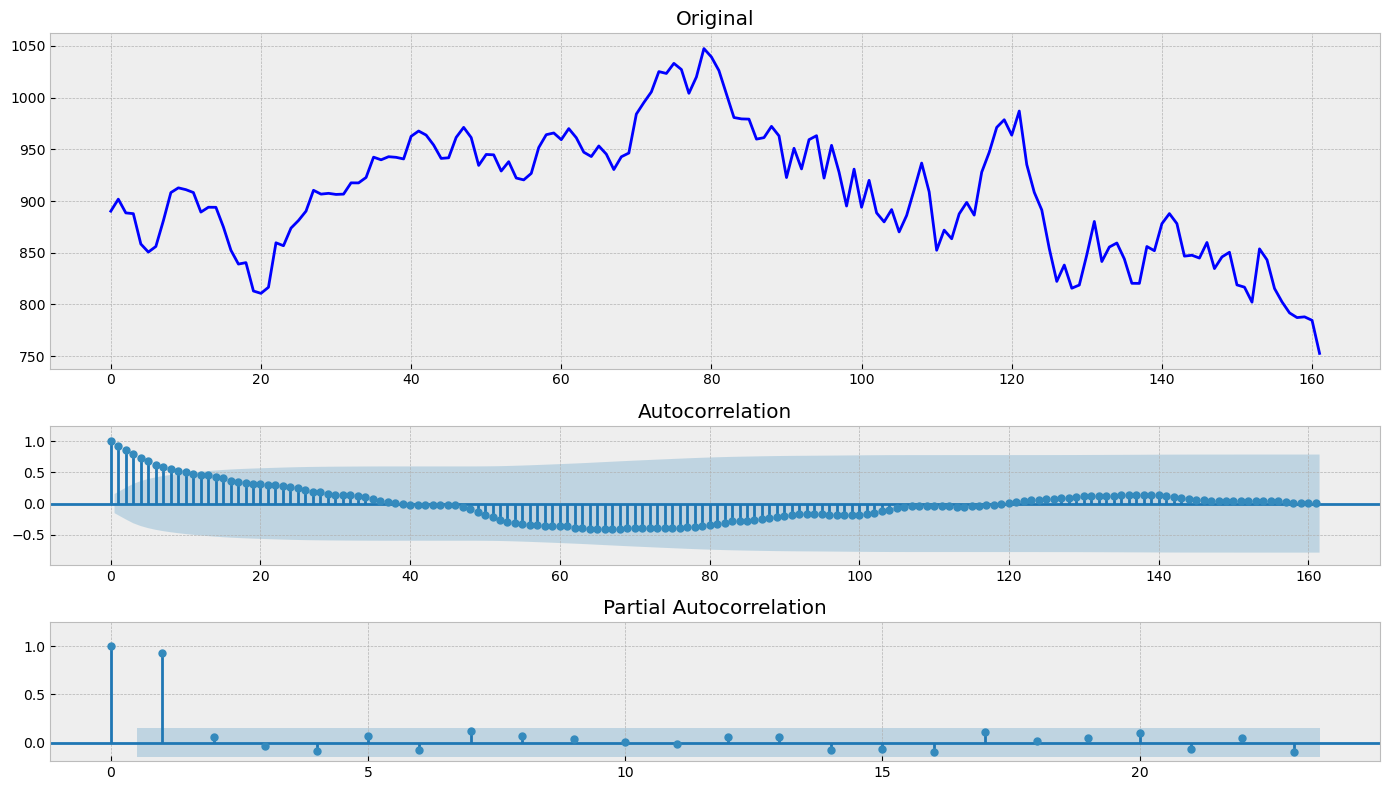

In [21]:
data = all_series['Weekly closings of the Dow-Jones industrial average']
tsplot(data)

Результат теста Дики-Фуллера не позволяет отвергнуть гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


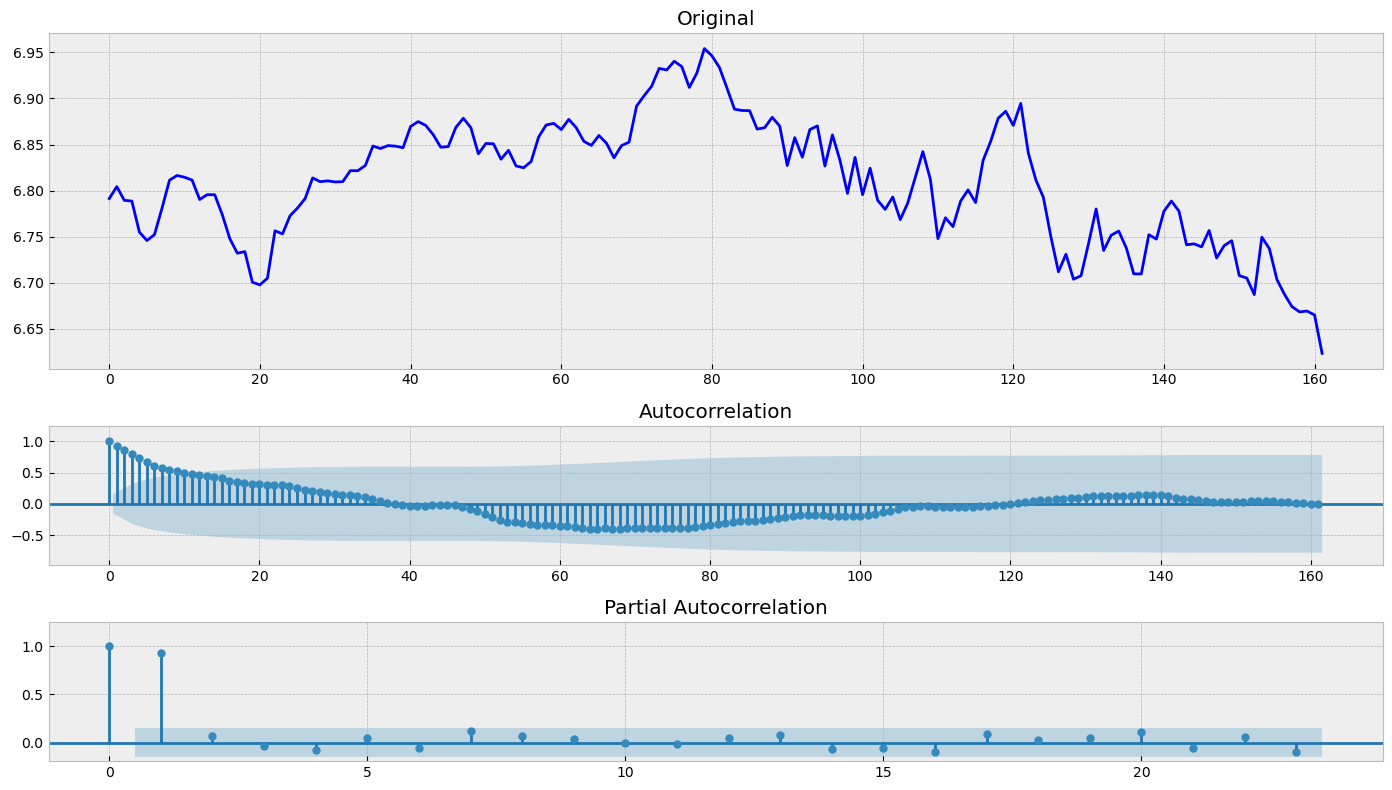

In [22]:
data = boxcox(data, 0)
tsplot(data)

Устраним тренд, применив дифференцирование.

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


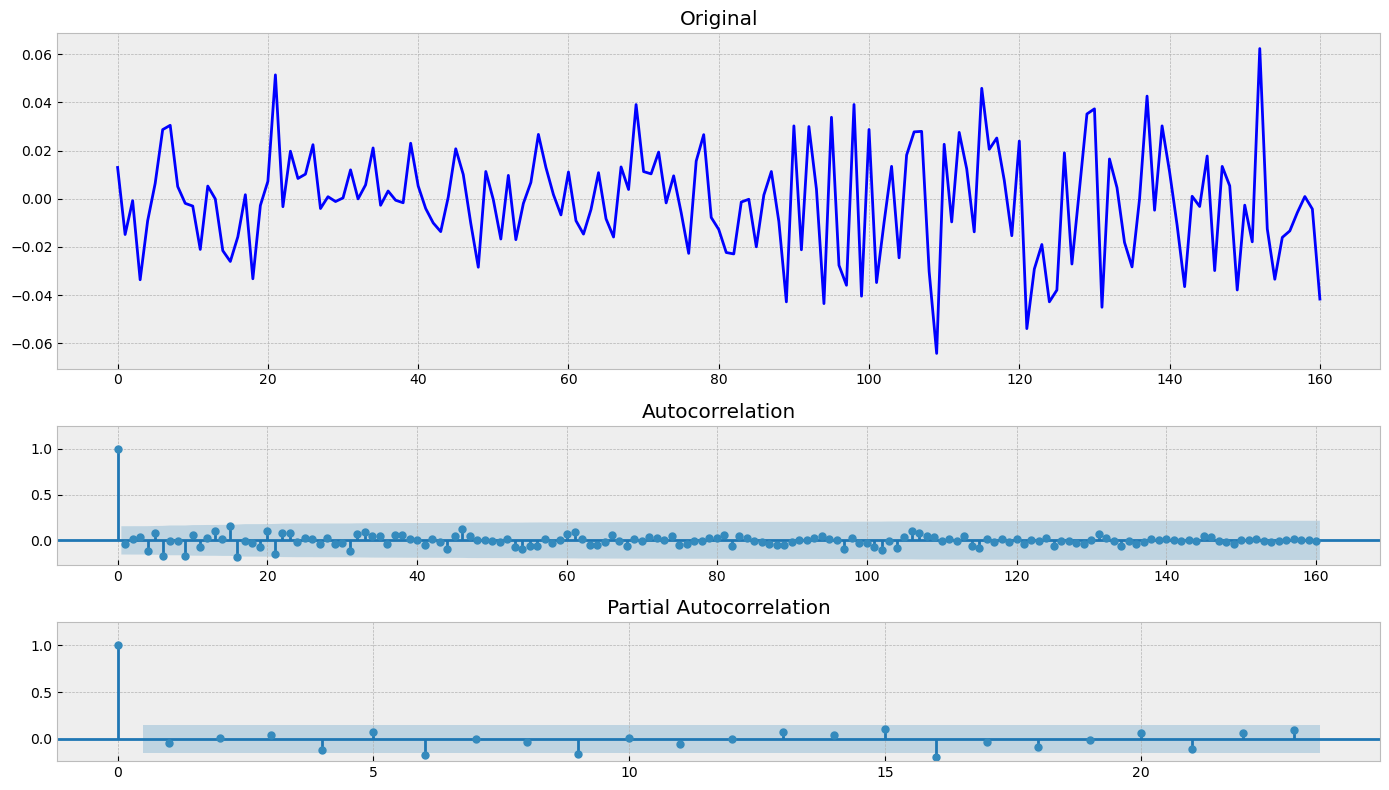

In [23]:
data = data[1:] - data[:-1]
tsplot(data)

**Вывод:** визуально и по результатам теста Дики-Фуллера мы можем отвергнуть гипотезу о нестационарности ряда.

### Исследование "Daily total female births in California".

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


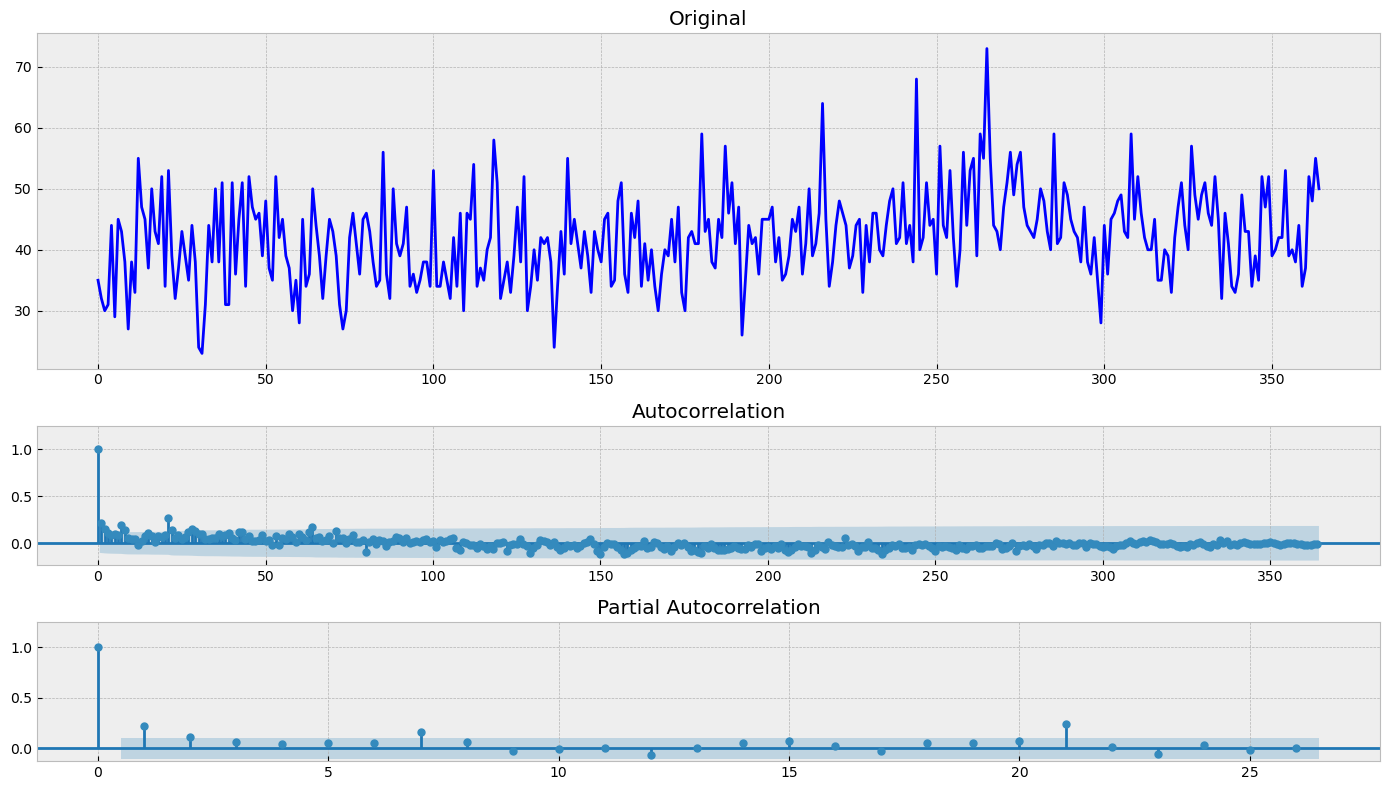

In [24]:
data = all_series['Daily total female births in California']
tsplot(data)

**Вывод:** визуально и по результатам теста Дики-Фуллера мы можем отвергнуть гипотезу о нестационарности ряда.

### Выводы

Были проведены исследования шести датасетов. В части из них присутствовали такие составляющие временных рядов, как тренд и сезонность. В результате таких преобразований, как преобразование Бокса-Кокса и дифференцирвоание все временные ряды удалось привести к стационарному виду. 